In this section, we will go through a simple machine learning application and create our first model. In the process, we will introduce some core concepts and terms.
<br><br>
Let's assume that a hobby botanicst is interested in distinguishing the species of some irish flowers that she has found. She has collected some measurements associated with each irish: the length and with of the petal and the length and with of the sepals, all measured in centimeters.
<br><br>
She also has the mesurements of some irishes that have been previously identified by measurements, she can be certian of which species each irish belongs to. Let's assume that these are the on;y species our hobby botanish will encounter in the wild.
<br><br>
Our goal is to build a machine learing model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.

Because we have measurements for which we know the correct species of iris, this is a supervised learning problem. In this problem, we want to predict one of several options (the species of irish). This is an example of classification problem. This ihe possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem.
<br>
<br>
The desired output for a single data point (an irish) is the species of thish flower. For a particular data point, the species it belongs to is called its label.

# Meet The Data

The data we will use for this example is the Irish dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the <b> load_iris </b> function:

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
print("key of irish_dataset: \n{}".format(iris_dataset.keys()))

key of irish_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [6]:
print(f"Target names: {iris_dataset['target_names']}")

Target names: ['setosa' 'versicolor' 'virginica']


In [7]:
print(f"Feature names: \n{iris_dataset['feature_names']}")

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(f"Type of data: {type(iris_dataset.data)}")

Type of data: <class 'numpy.ndarray'>


In [10]:
print(f"Shape of data: {iris_dataset.data.shape}")

Shape of data: (150, 4)


In [12]:
print(f"First five columns of data:\n{iris_dataset['data'][:5]}")

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print(f"Type of target: {type(iris_dataset.target)}")

Type of target: <class 'numpy.ndarray'>


In [15]:
f"Shape of target: {iris_dataset.target.shape}"

'Shape of target: (150,)'

In [17]:
print(f"Target:\n{iris_dataset.target}")

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Measuring Success: Training and Testing Data

scikit-learn contains a function that shuffles the dataset and splits it for you: the
train_test_split function. This function extracts 75% of the rows in the data as the
training set, together with the corresponding labels for this data. The remaining 25%
of the data, together with the remaining labels, is declared as the test set. Deciding how much data you want to put into the training and the test set respectively is somewhat
arbitrary, but using a test set containing 25% of the data is a good rule of thumb.
<br><br>
In scikit-learn, data is usually denoted with a capital X, while labels are denoted by
a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics,
where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a
matrix) and a lowercase y because the target is a one-dimensional array (a vector).

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (112, 4)
y_train shape: (112,)


In [25]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (38, 4)
y_test shape: (38,)


# First Things First: Look at Your Data

we have to visualize data using scatter plot. but we have convert the numpy array to pandas dataframe

In [27]:
import pandas as pd

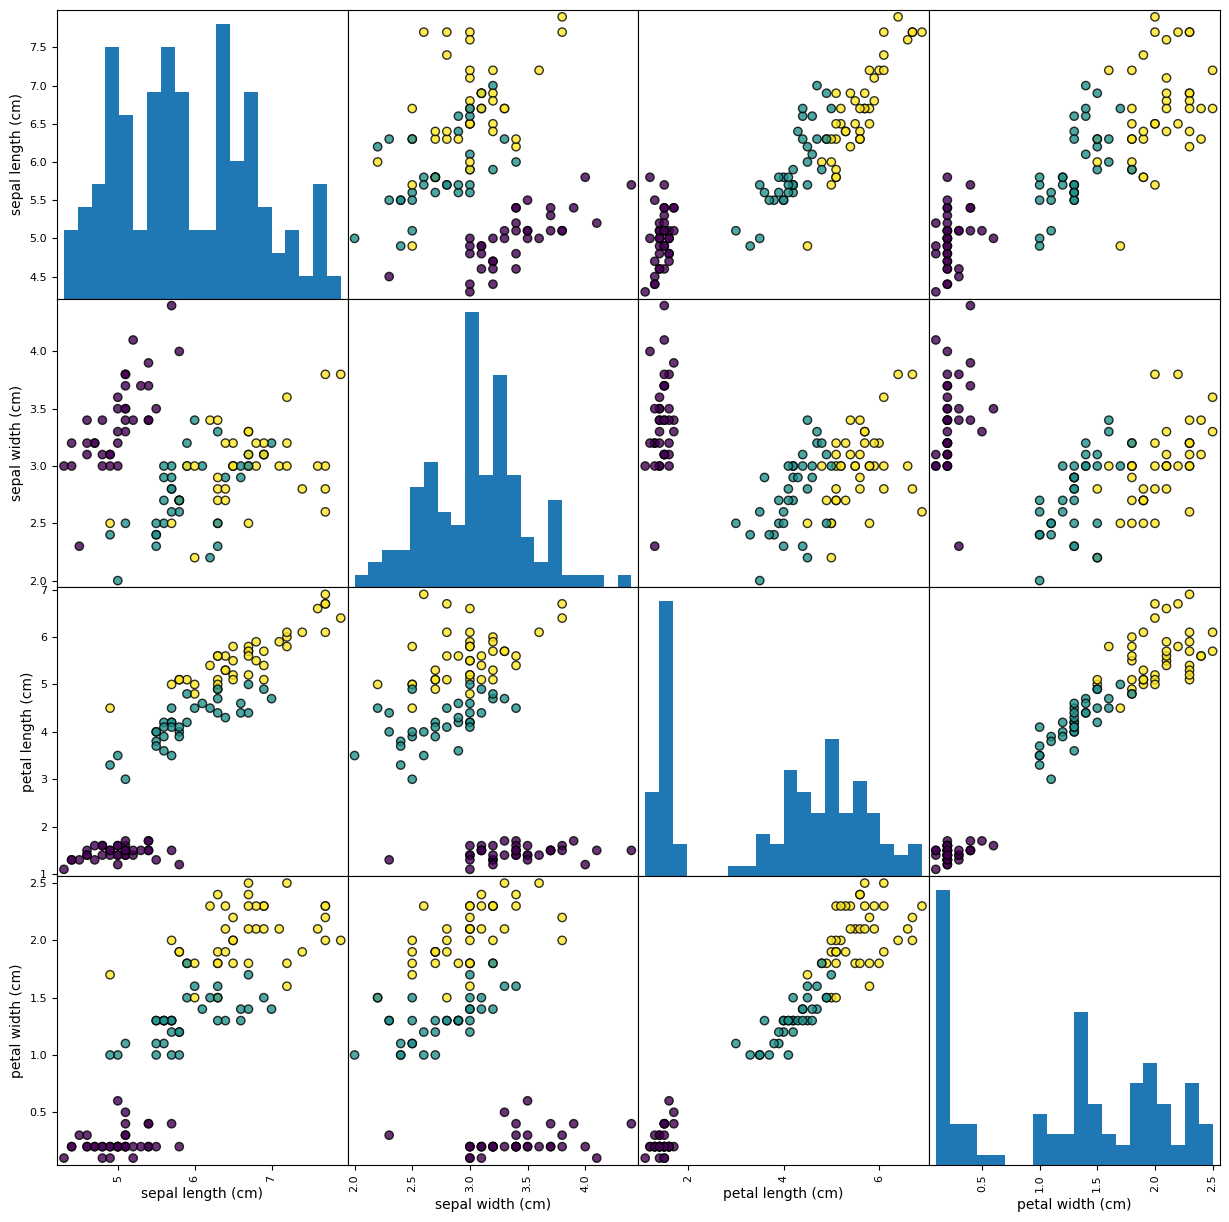

In [37]:
# create daaframe from data in X_train
# label the columns using the string in iris_dataset.feature_names
iris_dataFrame = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

#create a scatter matrix from the dataFrame, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataFrame, c=y_train, figsize=(15,15), 
                        marker='o', edgecolors='black', hist_kwds={'bins' : 20}, alpha = 0.8, cmap='viridis')

# Building Your First Model: K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
X_train.dtype

dtype('float64')

In [42]:
y_train.dtype

dtype('int64')

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Making Predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [46]:
import numpy as np

In [47]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


In [50]:
prediction = knn.predict(X_new)
print(f"Prediciton: {prediction}")
print(f"predicted target name: {iris_dataset['target_names'][prediction]}")

Prediciton: [0]
predicted target name: ['setosa']


# Evaluating the Model

This is were the test set we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set. <br>
<br>
Therefore, we can make a prediction for each iris in the test data and comare it against its label (the known species). We can measure how well the model works by computing the accuracy, which is faction of flowers for whifch the right species was predicted:

In [51]:
y_pred = knn.predict(X_test)
print(f"Test set predictions: \n{y_pred}")

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [52]:
print(f"Test set score: {(np.mean(y_pred==y_test)):.2f}")

Test set score: 0.97


In [54]:
print(f"Test set score: {knn.score(X_test, y_test):.2f}")

Test set score: 0.97
